<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/Lesson_02_Preparing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><b>Подготовка набора данных для задачи Object detection.</b></h1>

В этом уроке вы получите всю необходимую информацию и навыки для создания своего собственного датасета. Мы научимся подготавливать и обрабатывать датает для задачи Object Detection. Познакомимся со структурой аннотаций, инструментами для разметки изображений и конвертирования форматов меток. Разберёмся как облегчить поиск и сбор изображений. 

Большая часть программ, которые будут здесь использоваться, предназначены для использования локально на вашем компьютере. Нужно будет устанавливать необходимые инструменты, использовать командную строку и среду разработки. В этом ноутбуке будет представлен обзор инструментов, иструкции по установке и работе, и только примеры кода. Поэтому основную часть урока мы рекомендуем повторить на вашем компьютере используя текущие инструкции. 

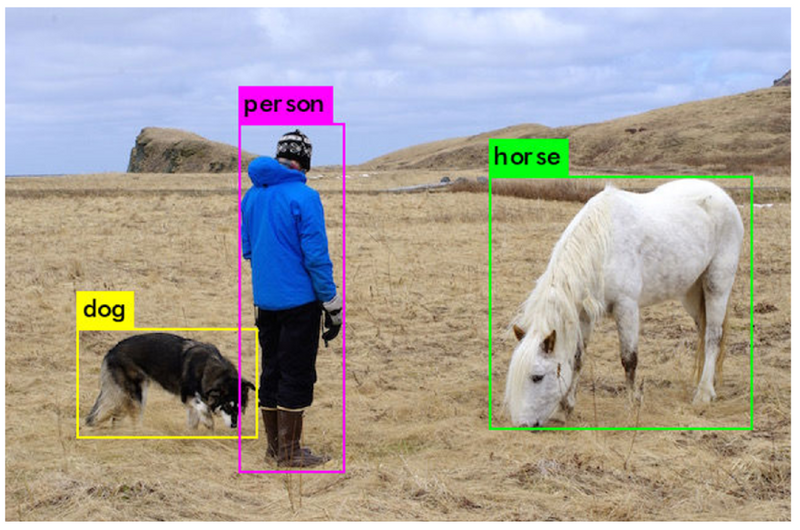

Скачиваем файлы, необходимые для урока, и устанавливаем корневыую папку проекта.

In [ ]:
!wget http://dataudt.ru/datasets/cv/Lesson_02.Preparing_dataset.zip
!unzip -qq Lesson_02.Preparing_dataset.zip
%cd /content/Lesson_02.Preparing_dataset/

--2021-07-02 10:24:12--  http://dataudt.ru/datasets/cv/Lesson_02.Preparing_dataset.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40905605 (39M) [application/zip]
Saving to: ‘Lesson_02.Preparing_dataset.zip’

Lesson_02.Preparing 100%[===================>]  39.01M  6.60MB/s    in 7.1s    

2021-07-02 10:24:20 (5.52 MB/s) - ‘Lesson_02.Preparing_dataset.zip’ saved [40905605/40905605]

/content/Lesson_02.Preparing_dataset


Посмотрим какие файлы и паки есть в архиве.

In [ ]:
!ls

animals_names.txt  animals_train.txt  oid_to_xml.py  xml_to_yolov3.py
animals_test.txt   Label	      OIDv4_ToolKit


Поиск и сбор набора данных, наравне с обработкой, наверное, наиболее важный и трудоёмкий этап решения какой-нибудь задачи с использованием Deep Learning, а тем более Object Detection. От качества датасета зависит точность определения координат ограничивающих рамок и класса объекта. Поэтому сбору и обработке датасета нужно уделить особое внимание.

Самый простой и в то же время сложный способ получения датасета - это сбор и разметка изображений собственноручно. Другой, более простой способ, это поиск уже готовых датасетов. Но очень редко бывает, что для вашей конкретной задачи найдётся в точности тот набор, который соответствует всем необходимым требованиям: наличие ограничиващих рамок в аннотациях, качество разметки, необходимое количество изображений каждого класса и др. На практике чаще всего приходится компоновать несколько датасетов, очищать их и добавлять недостоющие, используя ручную разметку.

## Обзор инструментов для разметки.

Для ручной разметки изображений рекомендую использовать программу <a href="https://github.com/tzutalin/labelImg">LabelImg</a>. Она очень простая в освоении и находится в свободном доступе. Программа сделана на пайтоне и обрела широкую популярность как среди специалистов, так и среди начинающих.

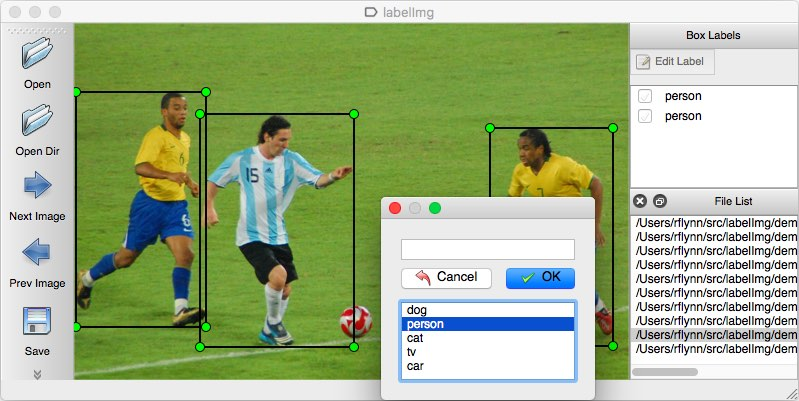

В ней можно размечать только ограничивающие прямоугольники и указывать класс объектов. Для задач сегментации она не подходит. Для удобства есть горячие клавиши. Самый большой плюс программы то, что для работы нужно установить необходимые модули, интерпритатор пайтона и всё. Это открывает возможности по модификации программы под свои нужды и упрощает установку. Из минусов можно выделить довольно простой неоптимизированный интерфейс, который заставляет делать лишние движения и то, что программа может работать только с метками в формате pascal voc xml или yolov2 (ниже объясним что это такое). Но этот недостаток можно компенсировать конверторами аннотаций, которых очень большое количество и под каждую модель.

В интернете есть много онлайн сервисов и программ для разметки и подготовки датасета. Они лишены недостатков программы LabelImg и более автоматизированы. Они облегчают и ускоряют разметку, позволяют конвертировать ограничивающие рамки в любой необходимый формат модели. Но, как правило, эти сервисы платные, либо предоставляют ограниченый пакет инструметов.

Таких сервисов довольно много и вы сами можете с ними познакомится и опробовать. В этом уроке мы рассмотрим возможности сервиса <a href="https://roboflow.com/">Roboflow</a>, без инструкций по работе. Инструкции вы сможете сами найти в интернете. Для работы нужно зарегистрироваться. Вы получите доступ к разметке изображений и доступ к готовым датасетам. Размечать датасет здесь более удобнее, сервис на себя берёт автоматизацию процесса, вам нужно только загрузить изражения, разметить и указать выходной формат аннотаций. Разметка происходит стандартным образом. Нужно выделить прямоугольником контур объекта и указать имя класса.

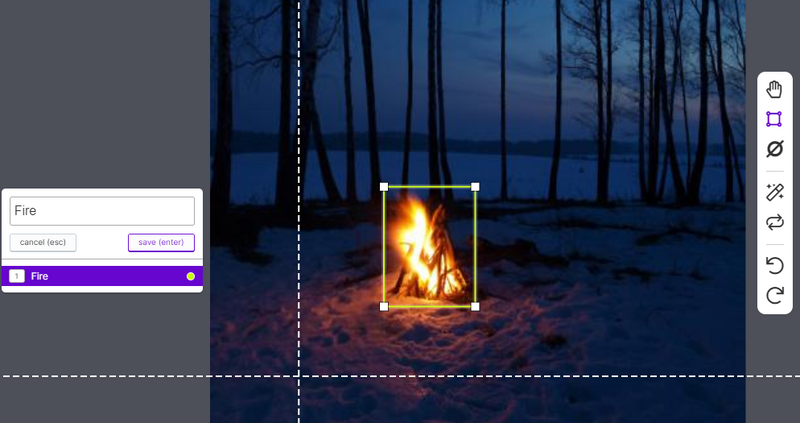

После разметки Roboflow даёт возможность разделить датасет на train test в определённых пропорциях, добавить агументацию данных.

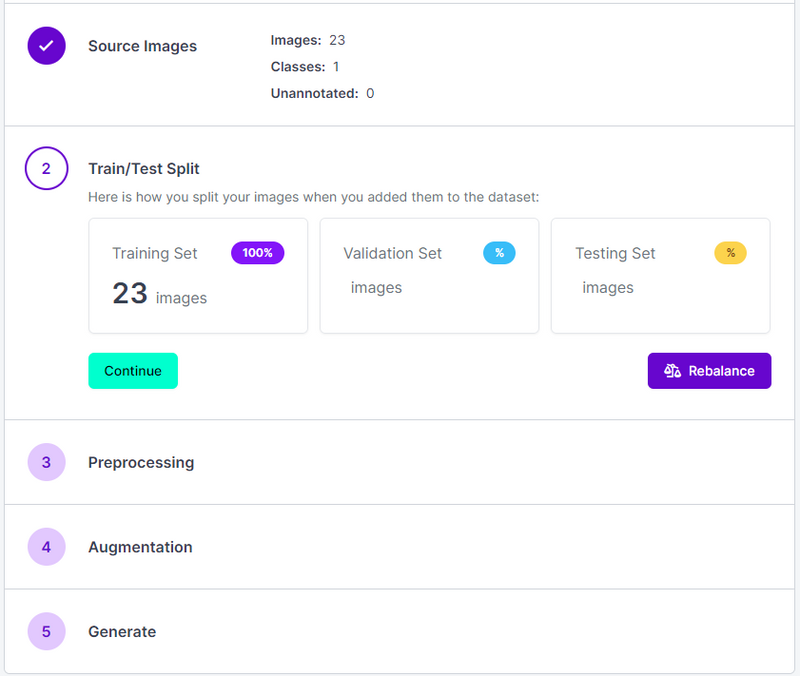

Также можно конвертировать аннотации в доступные форматы, сформировать датасет и скачать его. Ещё есть возможность обучить модель.

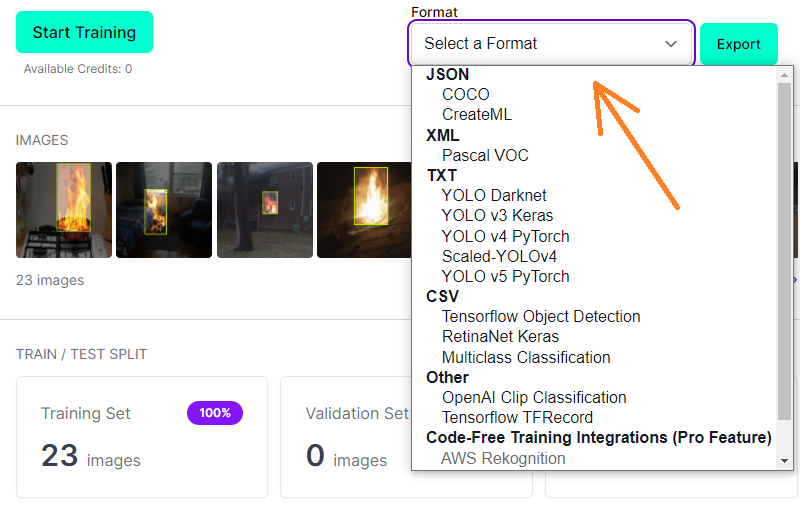

## Разметка изображений.

Остановимся подробнее на программе LabelImg. Скачаем её, установим и попробуем разметить изображения.

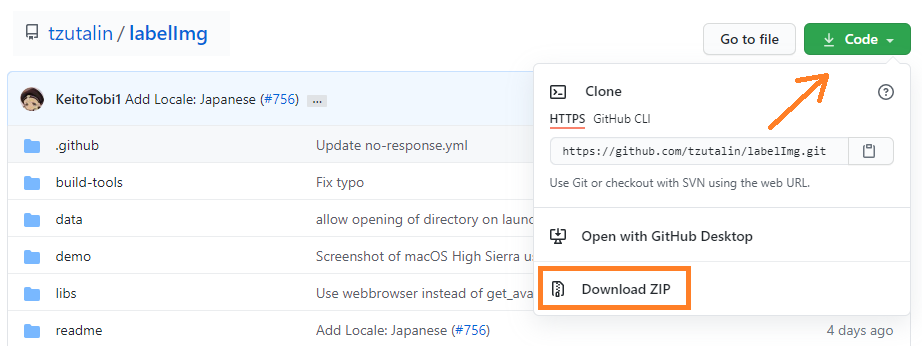

 По <a href="https://github.com/tzutalin/labelImg#windows">инструкции</a> установим необходимые модули. Я использую windows и anaconda. Откроем командную строку и установим pyqt и lxml. После, в командной строке, нужно перейти в папку, куда вы сохранили скачанный архив программы. Так как я работаю на диске D, в начале нужно изменить текщий диск, потом перейти в папку и ввести команду: pyrcc5 -o libs/resources.py libs/resources.qrc. Теперь можно запустить саму программу.

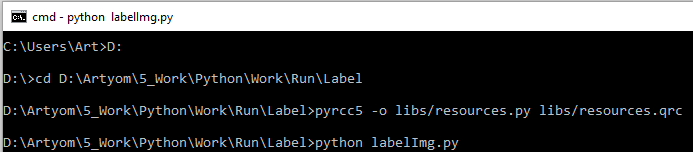

Интерфейс программы интуитивно понятен и не требует объяснений. Чтобы начать размечать изображения нужно указать папку, в которой они находятся нажав "Open Dir", чтобы нарисовать прямоугольник ограничивающей рамки объекта нужно выбрать "Create RectBox".

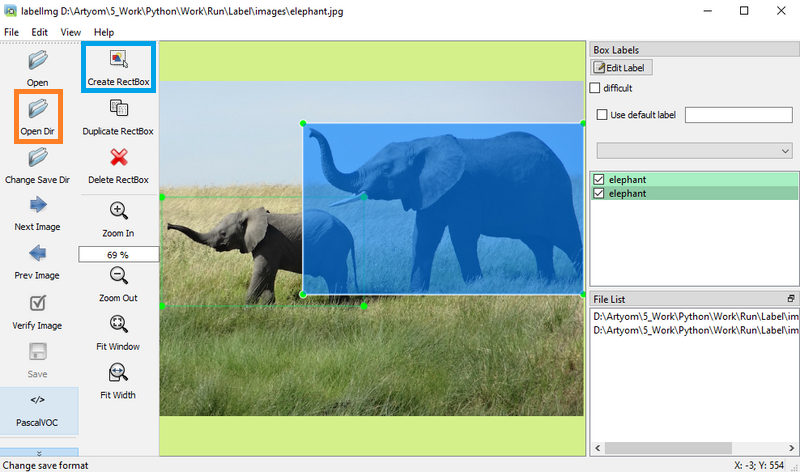

После выделения рамки нужно указать имя объекта. Имя можно напечатать в программе. Или, для ускорения разметки, все имена классов можно указать в текстовом документе "classes.txt", который должен находится в этой же папке с изображениями. Каждое название класса должно быть с новой строки. Когда закончили обводить объекты на изображении сохраняем файл аннотации и переходим к следующей картинке. Формат аннотаций лучше ипользовать PascalVoc (ниже подробнее коснёмся этого).

## Готовые наборы данных.

Программа для разметки у нас есть. Теперь нам нужны изображения. Самый простой способ получить изображения это "загуглить" или же воспользоваться разными сервисами и хранилищами. В общем искать и скачативать изображения с интернета. Это довольно долго и неудобно. Чтобы облегчить и автоматизировать этот процесс есть специальные скрипты. Рассмотр их выходит за рамки данного урока, вы можете сами их найти и разобраться. Как один из вариантов можно воспользоваться инструментом <a href="https://github.com/hardikvasa/google-images-download">Google Images Download</a>. Он позволяет искать и скачивать изображения с гугл картинок. Ещё есть простенькая программа, которая помагает скачать изображения с поиска гугл в разделе картинки. Для этого используется код на javascript, который формирует список ссылок на картинки, а уже код на пайтоне скачивает и упаковывает их. К сожелению данные скрипты не работают с яндекс картинками. Хотя изображения, которые выдаёт поисковик в яндекс картинках чаще бывают более релевантные.

Но к ручному поиску и разметке следует прибегать только когда исчерпали все другие варианты. Сейчас чаще всего, если у вас не редкая и специфическая задача, вы можете найти готовый датасет, а то и несколько, либо что-то похожее, что можно скомпоновать и доработать.

Если у вас возникла необходимость собрать датасет нахождения или сегментации объектов на изображениях, то первое, куда вам нужно залянуть, это <a href="https://storage.googleapis.com/openimages/web/index.html">Open Images Dataset</a> от Google. OID - это совместный открытый датасет, в котором около 9 миллионов размеченых изображений, снабженных метками класса, ограничивающими рамками объектов, масками сегментации и визуальными связями. Этот уникально большой и разнообразный набор данных призван стимулировать современные достижения в области анализа и понимания изображений. Изображения очень разнообразны и часто содержат сложные сцены с несколькими объектами (в среднем 8,4 на изображение) и около 600 доступных классов объектов.

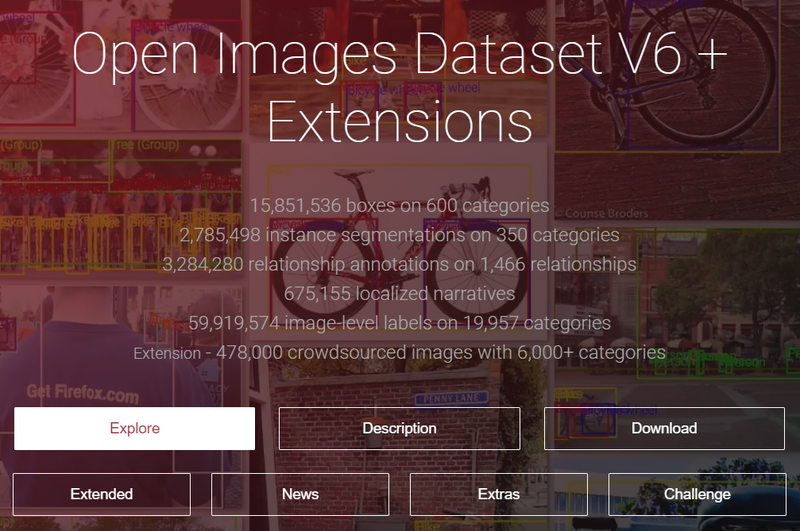

Ещё стоит обратить внимание на <a href="https://cocodataset.org/">COCO Dataset</a> (Common objects in context). Этот тоже довольно известный и большой набор данных по object detection. Он имеет 80 классов объектов и более 200 тысяч размеченных изображений. Оригинальные модели yolo обучались на этом датасете.

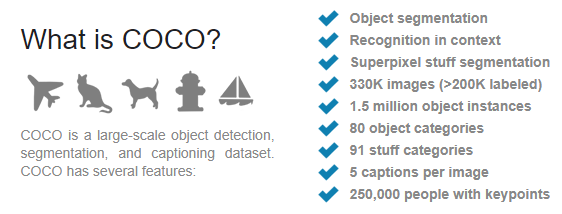

Также на сайте датасета есть раздел с поиском изображений с объектами <a href="https://cocodataset.org/#explore">Dataset explore</a>.

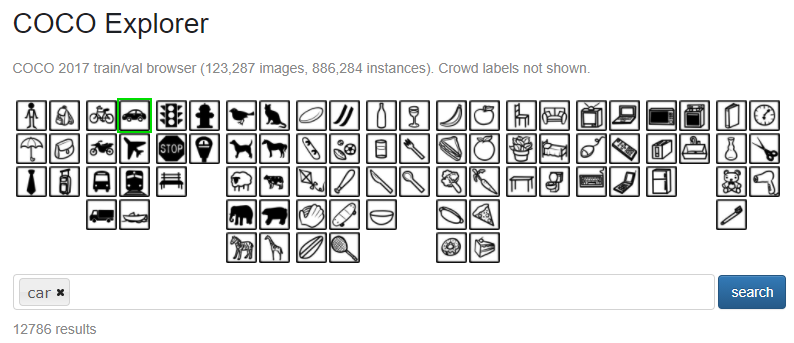

В общем в первую очередь нужно поискать уже готовые датасеты. Чаще всего наборы данных можно найти на github по похожим задачам или на kaggle.

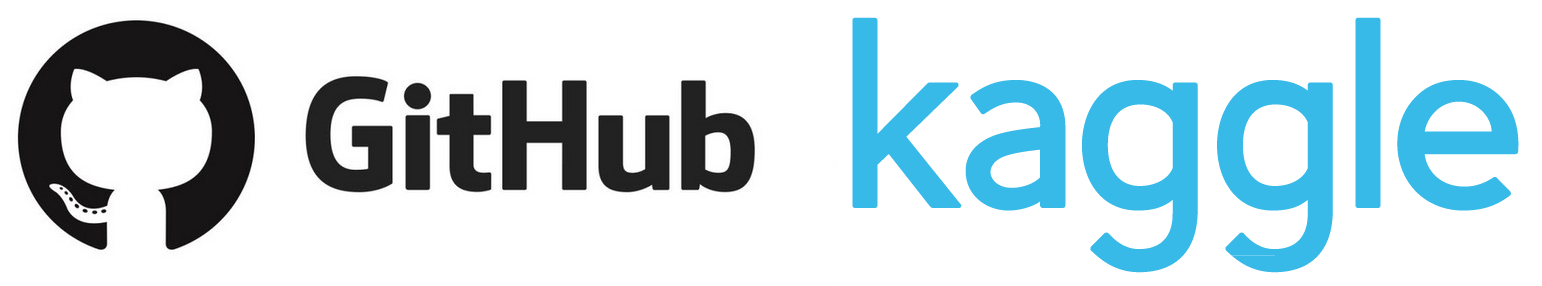

Также многие фреймворки и библиотеки глубокого обучения имеют в своём составе готовые наборы данных для различных задач. Например, в tensorflow есть <a href="https://www.tensorflow.org/datasets/catalog/overview#object_detection">датасеты по object detection</a>.

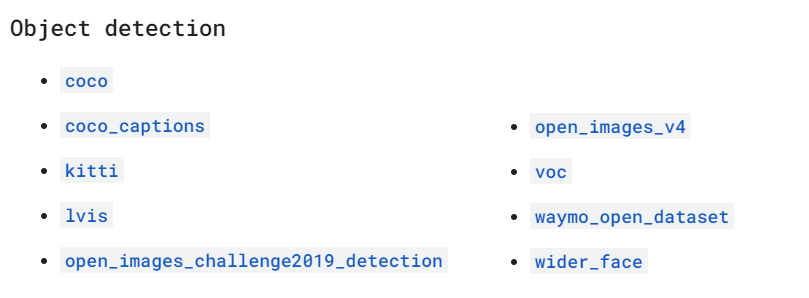

## Скачиваение изображений и анноаций с Open image dataset.

Для примера мы подробнее остановимся как получить изображения и аннотации с Open image dataset. Чтобы перейти к поиску изображений в OID, нужно на главной странице нажать кнопку "Explore". В поиске "Category" ввести необходимый класс, выбрать из присутствующих вариантов, если есть необходимый. Также нужно выбрать тип меток в "Type".

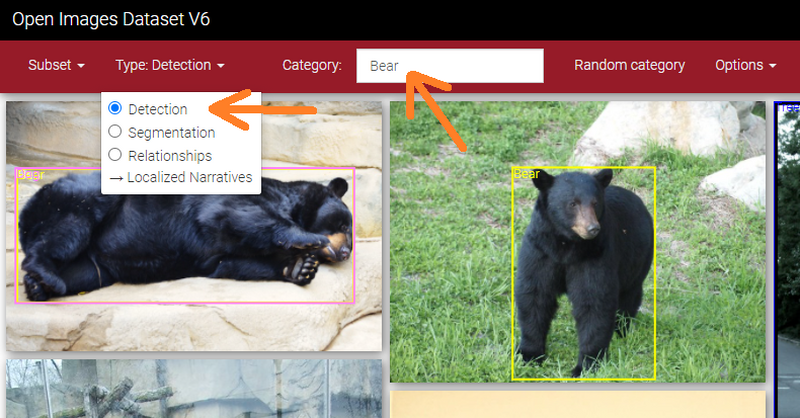

Просто скачать изображения с аннотациями не получится, для этого нужно использовать специальные инструменты. Сам сайт во вкладке <a href="https://storage.googleapis.com/openimages/web/download.html">"Download"</a> предлагает программу для скачивания, редактирования и просмотра датасета - FiftyOne от команды Voxel51. На этой же странице есть подробное описание возможностей инструмента и инструкция по установке.

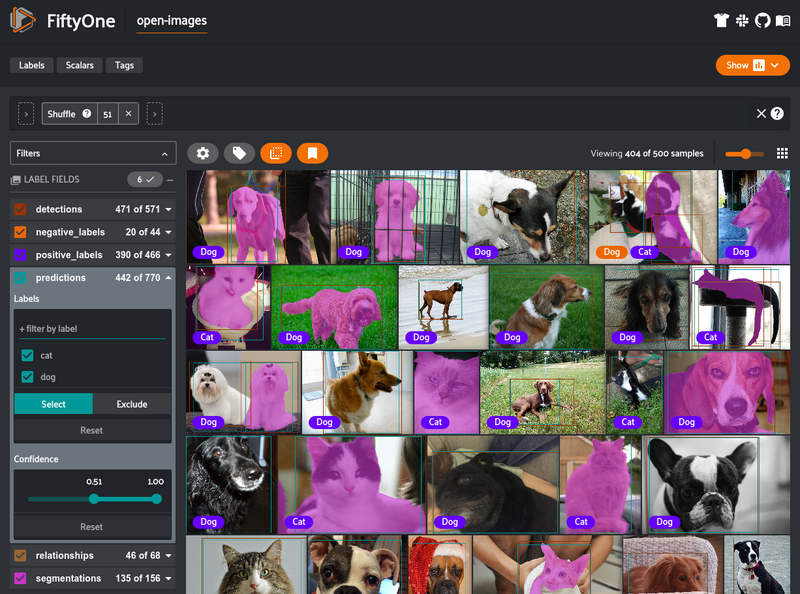

Мы же в нашем уроке будем использовать более простой инструмент <a href="https://github.com/EscVM/OIDv4_ToolKit">OIDv4 ToolKit</a> с гитхаба, который полностью удовлетворяет нашим задачам. Эта программа позволяет скачать необходимое количество изображений нужного класса с аннотациями. Она очень проста в обращении.

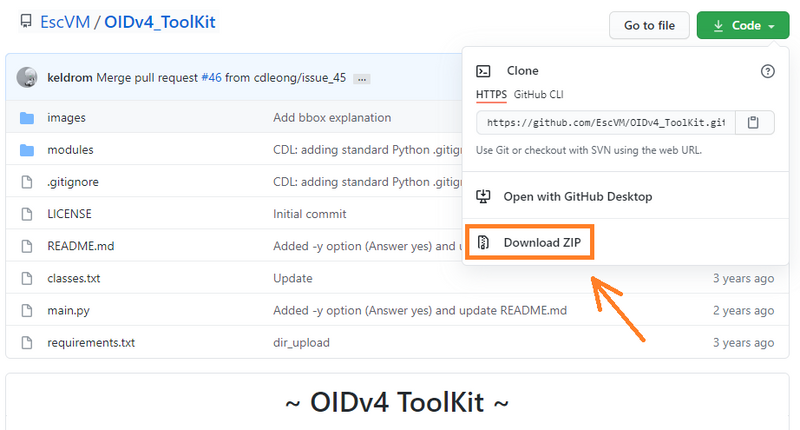

Чтобы начать работу нужно скачать репозиторий с гитхаба и установить все необходимые модули с документа requirements.txt. Или же использовать команды: git clone https://github.com/EscVM/OIDv4_ToolKit.git для скачивания, и pip3 install -r requirements.txt для установки модулей. 

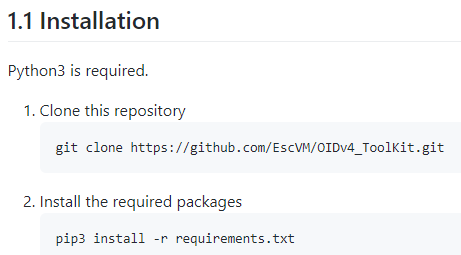

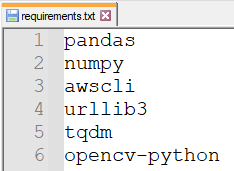

После скачивания программы и установки необходимых модулей открываем командную строку чтобы запустить OIDv4_ToolKit. Для этого изменяем текущую директорию на папку с разархивированной программой. Так как у меня установлено на диск D, в начале изменим текущий диск, потом установим директорию с программой и запустим скрипт. Для скачивания изображений нужно указать аргументы в командной строке: python main.py downloader --classes Bear Giraffe Zebra --type_csv train --limit 100. Здесь после аргумента classes через пробел указываютя имена классов, которые необходимо скачать. Для примера скачаем изображения медведя, жирафа и зебры с метками. Перед скачиванием обязательно нужно проверить есть ли такой класс в базе Open Images и уточнить его написание. Если название класса состоит из двух слов, например, Alarm Clock, то нужно писать в кавычках, а классы из одного слова можно писать просто: 'Alarm Clock' 'Computer mouse' Table. Если не будет работать, то вместо одинарных кавычек нужно использовать двойные: "Alarm Clock" "Computer mouse" Table. Аргумент limit указывает какое количество изображений каждого класса нужно скачать. Для примера скачаем по 100 изображений каждого класса. Аргумент type_csv указывает как назвать папку с датасетом (train, validation, test или другие).

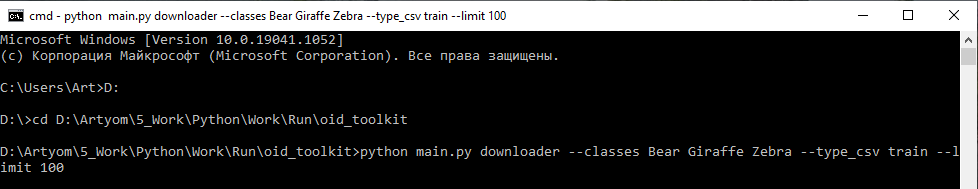

Программа спросит у нас хотим ли мы скачать отсутсвующие файлы, соглашаемся написав "y" и начинается скачивание последовательно по классам.

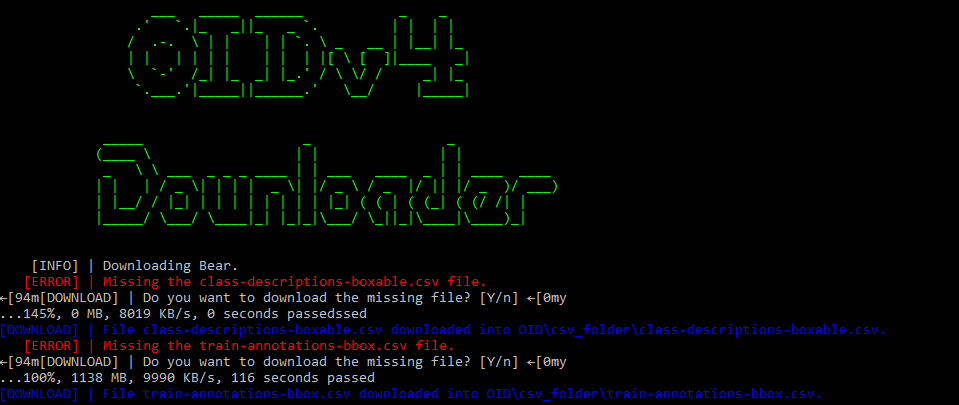

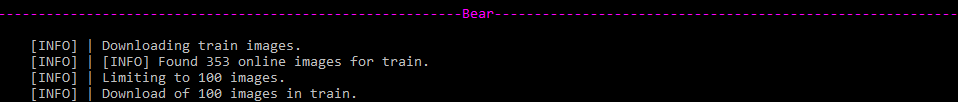

Иногда могут отображаться надписи: "Не найдено сопоставление для расширения имени файла .py.". Ничего страшного, это не повлияет на работу, все изображения и метки будут загружены в необходимом количестве.

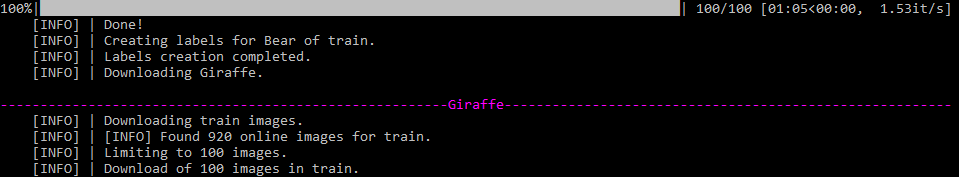

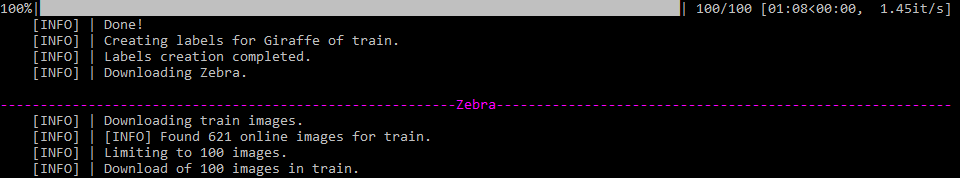

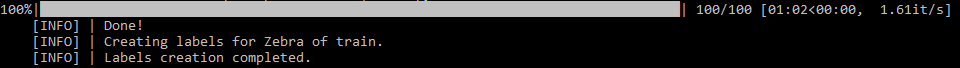

После завершения скачивания в папке проекта OIDv4_ToolKit-master по пути OID/Dataset/train/ будут папки с изображениями. Имена папок соответсвуют именам классов.

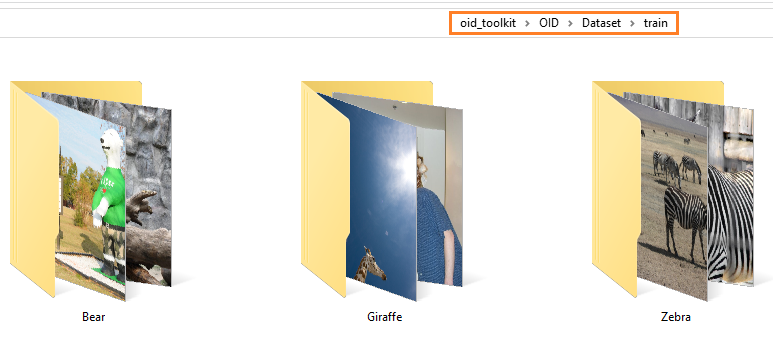

Внутри этих папок есть папка Label, в которой находятся аннотации для каждого изображения. Метки сделаланы в формате txt, имя файла метки совпадает с именем аннотации.

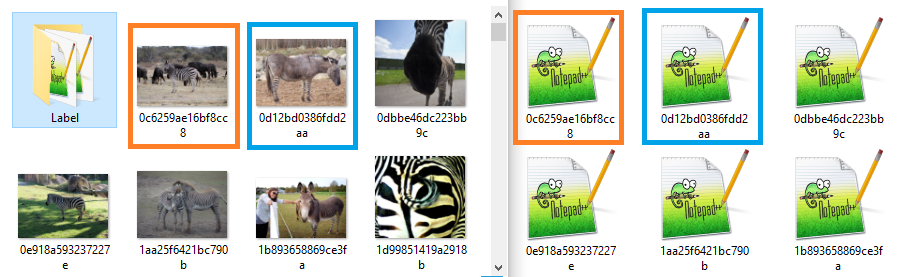

Откроем файл аннотации пятого изображения и посмотрим его структуру. Здесь две зебры. Какждый объект изображения записывается с новой строки. Первым идёт имя класса объекта, потом через пробел координаты ограничивающего прямоугольника: Имя_класса xmin ymin xmax ymax.

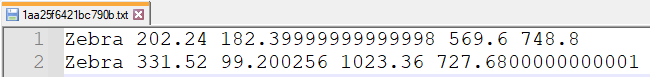

Координаты рамки здесь в виде float. Это получается потому что oid хранит координаты в нормированном виде относительно размера изображения (от 0 до 1), а при формировании файла меток пересчитывает их в абсолютные координаты. Пиксели на изображениях могут иметь адрес только в целочисленном виде. Поэтому при загрузке датасета для обучения нужно будет отбросить дробную часть.

## Конвертация из OID в Pascal VOC xml.

Далее нам нужно конвертировать эти аннотации в формат Pascal VOC xml. Почему именно xml? Потому что это очень популярный, удобный и часто используемый формат для хранения меток. Многие инструменты и сервисы для разметки и сбора датасета используют его. Как мы покажем дальше, формат меток yolov3 не очень удобный на этапе сбора и обработки датасета, но не имеет ничего лишнего для обучения. Когда только идёт процесс создания набора данных на много удобнее обрабатывать, очищать и структурировать метки в формате xml. Уже после окончательной проверки датасета можно конвертировать xml метки в любой другой необходимый формат и начать обучение модели.

Чтобы конвертировать полученные выше oid метки в формат xml воспльзуемся конвертером oid_to_xml. Эта программа есть в архиве урока. Здесь, в ноутбуке, ниже будет приведён код этой программы и маленький датасет для примера работы конвертера. Советуем вам запустить код этой программы в какой-нибудь среде разработки, например, pycharm и выполнить конвертацию. Обращаем внимание, чтобы правильно сработал конвертер, структура каталогов не должна изменяться.

После скачивания, изображения и метки будут находится по пути OIDv4_ToolKit/OID/Dataset. Этот путь уже прописан в конвертере. Вам нужно создать папку проекта, в которую положить файл программы конвертера и перенести туда папку OIDv4_ToolKit, или же указать на неё путь. Потом просто запустив выполнение программы, отобразится прогресс конвертирования и вы получите xml метки в том же расположении, что и изображения. 

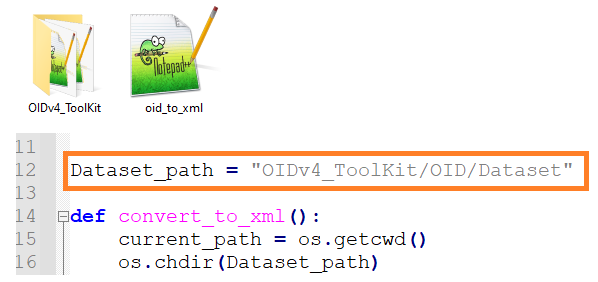

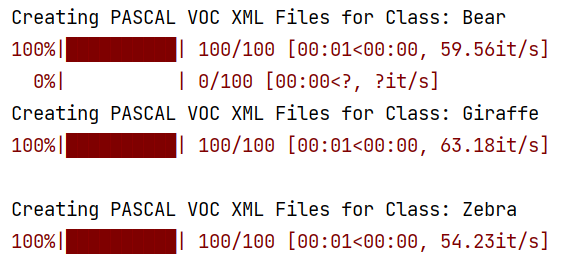

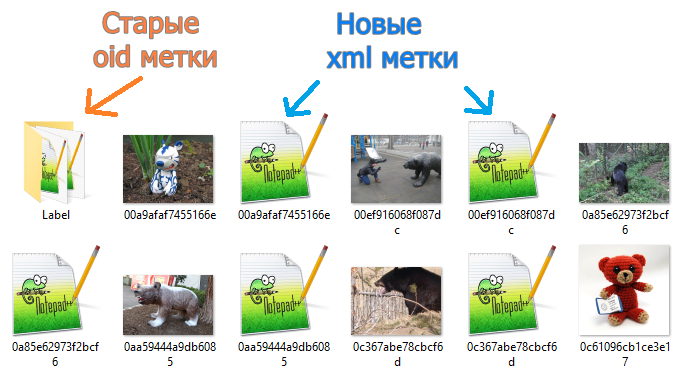

Откроем какой-нибудь файл xml и посмотрим его содержимое. Здесь понятные обозначения, которые не требуют объяснений. Каждый объект изображения отделяется тегами "object" и имеет внутри себя координаты ограниничивающей рамки.

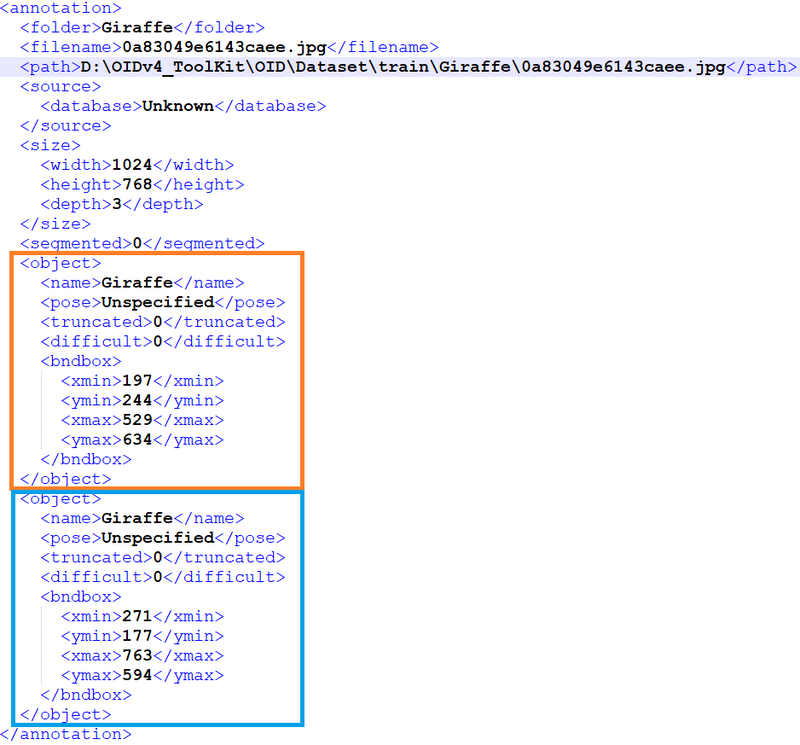

Ниже приведён код конвертера меток из oid в xml. Для примера в архиве есть уменьшенная версия датасета с метками.

In [ ]:
# Импортируем необходимые модули
import os
from tqdm import tqdm
import cv2
from lxml import etree

# Путь к датасету.
Dataset_path = "OIDv4_ToolKit/OID/Dataset"

# Функция конвертирования меток 
# с формата oid в Pascal VOC xml.
def convert_to_xml():
    # Получаем путь текущего рабочего каталога.
    current_path = os.getcwd()
    # Изменяем текущий рабочий каталог на указанный путь.
    os.chdir(Dataset_path)
    # Получаем список файлов и папок в указанной директории.
    DIRS = os.listdir(os.getcwd())

    # Перебираем полученный список.
    for DIR in DIRS:
        # Если элемент списка является папкой,
        if os.path.isdir(DIR):
            # то изменяем рабочую директорию на текущую.
            os.chdir(DIR)

            # Выводим название подпапки каталога.
            print("Currently in Subdirectory:", DIR)
            
            # Получаем список папок в каталоге.
            # Имена папок соответствуют именам класов.
            CLASS_DIRS = os.listdir(os.getcwd()) 
            
            # Перебираем список имён (папок) классов.
            for CLASS_DIR in CLASS_DIRS:
                # Если в имени папки есть пробел,
                # заменяем его нижним подчёркиванием
                # и переименовуем папку.
                if " " in CLASS_DIR:
                    os.rename(CLASS_DIR, CLASS_DIR.replace(" ", "_"))
            
            # Опять создаём список имён классов,
            # только уже без пробелов.
            CLASS_DIRS = os.listdir(os.getcwd())
            
            # Перебираем имена папок класов.
            for CLASS_DIR in CLASS_DIRS:
                # Если элемент списка является папкой,
                if os.path.isdir(CLASS_DIR):
                    # изменяем рабочую директорию на текущую.
                    os.chdir(CLASS_DIR)
                    
                    # Выведем имя текущего класса.
                    print("\n" + "Creating PASCAL VOC XML Files for Class:", CLASS_DIR)
                    
                    # Устанавливаем рабочую папку с метками oid.
                    os.chdir("Label")

                    # Создаём файл с метками Pascal xml.
                    # Для отображения прогресса конвертирования
                    # будем использовать модуль tqdm.
                    
                    # Перебираем файлы меток в папке "Label"
                    for filename in tqdm(os.listdir(os.getcwd())):
                        # Если файл является текстовым документом
                        if filename.endswith(".txt"):
                            # сохраним имя файла без формата файла.
                            filename_str = str.split(filename, ".")[0]

                            # Начинаем формировать структуру аннотации xml.
                            annotation = etree.Element("annotation")
                            
                            # Указываем информацию по изображению.
                            # Возвращаемся на одину папку назад.
                            os.chdir("..")
                            # Указываем тег название папки.
                            folder = etree.Element("folder")
                            # Получаем название папки и указываем его в теге.
                            folder.text = os.path.basename(os.getcwd())
                            # Добавляем в структуру.
                            annotation.append(folder)

                            # Указываем название изображения.
                            filename_xml = etree.Element("filename")
                            filename_xml.text = filename_str + ".jpg"
                            annotation.append(filename_xml)

                            # Указываем абсолютный путь к изображению.
                            path = etree.Element("path")
                            path.text = os.path.join(os.path.dirname(os.path.abspath(filename)), filename_str + ".jpg")
                            annotation.append(path)
                            
                            # Добавляем в структуру данные по датасету (пустые).
                            source = etree.Element("source")
                            annotation.append(source)
                            database = etree.Element("database")
                            database.text = "Unknown"
                            source.append(database)

                            # Создаём тег для размера изображения
                            # и добавляем его.
                            size = etree.Element("size")
                            annotation.append(size)

                            # Указываем ширину, длину и количество 
                            # каналов цвета изображения.
                            width = etree.Element("width")
                            height = etree.Element("height")
                            depth = etree.Element("depth")

                            # Открываем текущее изображение с помощью opencv.
                            img = cv2.imread(filename_xml.text)

                            # Считываем размеры изображения.
                            try:
                                width.text = str(img.shape[1])
                            except AttributeError:
                                os.chdir("Label")
                                continue
                            height.text = str(img.shape[0])
                            depth.text = str(img.shape[2])
                            
                            # И добавляем их в структуру.
                            size.append(width)
                            size.append(height)
                            size.append(depth)

                            # Указываем номер сегмента 
                            # (0 - одни, не разделён).
                            segmented = etree.Element("segmented")
                            segmented.text = "0"
                            annotation.append(segmented)

                            # Записываем на информацию по объектам.
                            # Переходим в папку с метками.
                            os.chdir("Label")
                            # Открываем файл меток в режиме чтения.
                            label_original = open(filename, 'r')

                            # Перебираем строки файла аннотаций.
                            # Строка аннотации имеет следующий вид:
                            # Имя_класса xmin ymin xmax ymax.
                            for line in label_original:
                                # Убираем боковые пробелы в строке.
                                line = line.strip()
                                # И делим строку по пробелам.
                                l = line.split(' ')
                                
                                # Вычисляем длинну имени класса
                                # (количество элементов списка,
                                # которе занимает имя).
                                class_name_len = len(l) - 4
                                # Если в имени используются пробелы,
                                # склеиваем имя используя "_".
                                class_name = l[0]
                                for i in range(1,class_name_len):
                                    class_name = f"{class_name}_{l[i]}"

                                # Сохраняем длинну класса.
                                addi = class_name_len

                                # Переводим координаты в целочисленный вид.
                                xmin_l = str(int(round(float(l[0+addi]))))
                                ymin_l = str(int(round(float(l[1+addi]))))
                                xmax_l = str(int(round(float(l[2+addi]))))
                                ymax_l = str(int(round(float(l[3+addi]))))
                                
                                # Добавляем тег объекта.
                                obj = etree.Element("object")
                                annotation.append(obj)

                                # Указываем и добавляем имя класса.
                                name = etree.Element("name")
                                name.text = class_name
                                obj.append(name)

                                # Указываем для структуры значения
                                # (в данной задаче не важные).
                                pose = etree.Element("pose")
                                pose.text = "Unspecified"
                                obj.append(pose)

                                truncated = etree.Element("truncated")
                                truncated.text = "0"
                                obj.append(truncated)

                                difficult = etree.Element("difficult")
                                difficult.text = "0"
                                obj.append(difficult)

                                # Указываем тег ограничивающей рамки.
                                bndbox = etree.Element("bndbox")
                                obj.append(bndbox)
                                
                                # Добавляем координаты 
                                # ограничивающего прямоугольника.
                                xmin = etree.Element("xmin")
                                xmin.text = xmin_l
                                bndbox.append(xmin)

                                ymin = etree.Element("ymin")
                                ymin.text = ymin_l
                                bndbox.append(ymin)

                                xmax = etree.Element("xmax")
                                xmax.text = xmax_l
                                bndbox.append(xmax)

                                ymax = etree.Element("ymax")
                                ymax.text = ymax_l
                                bndbox.append(ymax)

                            # Выходим из папки с метками в папку с изображениями.
                            os.chdir("..")
                            
                            # Записываем сформированную структуру в файл xml.
                            s = etree.tostring(annotation, pretty_print=True)
                            with open(filename_str + ".xml", 'wb') as f:
                                f.write(s)
                                f.close()

                            # Возвращаемся в папку с метками.
                            os.chdir("Label")

                    # Возвращамся на две паппки назад,
                    # то есть в папку с классами объектов.
                    os.chdir("..")
                    os.chdir("..")   
                       
            # Переходим в папку с датасетами (train, test).
            os.chdir("..")

# Запускаем конвертацию.
convert_to_xml()

 50%|█████     | 5/10 [00:00<00:00, 47.25it/s]

Currently in Subdirectory: test

Creating PASCAL VOC XML Files for Class: Bear


  0%|          | 0/10 [00:00<?, ?it/s]


Creating PASCAL VOC XML Files for Class: Zebra

Creating PASCAL VOC XML Files for Class: Giraffe


  0%|          | 0/10 [00:00<?, ?it/s]

Currently in Subdirectory: train

Creating PASCAL VOC XML Files for Class: Bear

Creating PASCAL VOC XML Files for Class: Zebra


100%|██████████| 10/10 [00:00<00:00, 64.40it/s]


Creating PASCAL VOC XML Files for Class: Giraffe


Теперь имея аннотации в формате xml мы можем перейти к обработке датасета. Первое что нужно сделать, это посмотреть разметку изображений. Для этого можно открыть аннотации в инструменте LabelImg. Если есть недочёты в разметке, подправить их и просмотреть все изображения, удалить неправильные. Потом можно посчитать количество, понять чего не хватает, есть ли баланс классов и добавить необходимые.

## Конвертация из Pascal VOC xml в Yolov3.

После того, как мы закончили все манипуляции с датасетом, и можем приступить к обучению, нам нужно конвертировать метки уже в формат той модели, которую будем обучать. Следующий урок курса будет посвящён обучению модели yolov3. Поэтому конвертируем метки в формат этой модели.

Для этого воспользуемся программой xml_to_yolov3. Файл с программой есть в архиве урока. Изображения и метки у нас также находятся в папке OIDv4_ToolKit по тому же пути. Нужно указать только названия текстовых документов, в которые будут сохраняться конвертированные аннотации и имена клссов.

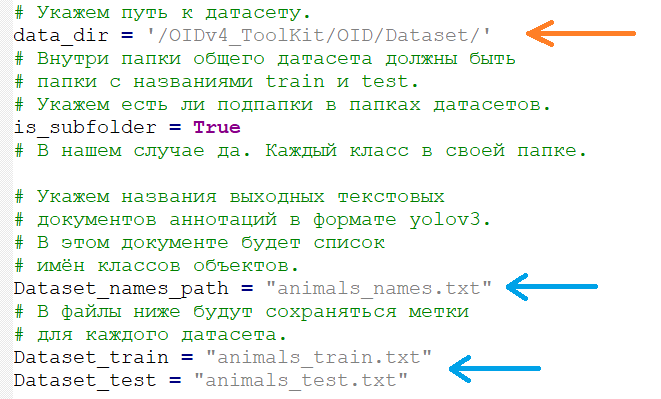

Просто запукаем, получаем лог процесса и в конце список имён классов. Текстовые документы с аннотациями сохранятся в той же папке. Откроим один из них и посмотрим содержимое.

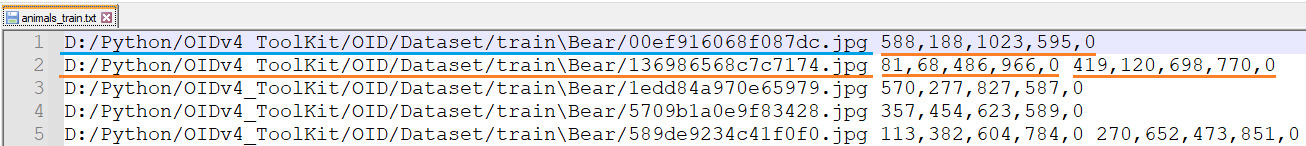

Аннотации формата yolov3 имеют вид строк текстового документа. Каждая строка соответсвует одному изображению. Данные в строке разделяются пробелами, поэтому в названиях изображений и каталогов не должно быть пробелов для избежания ошибок. Первым в строке идёт путь к изображению, потом идут 5 цифровых значений через запятую без пробелов. Эти цифровые значения соответствуют координатам ограничивающего прямоугольника и номеру класса объекта в этой рамке: xmin,ymin,xmax,ymax,class_index. Рамки объектов разделяются пробелами.

Часто бывает так, что за ранее не знаешь по какому пути будут находиться файлы для обучения. А если обучение будет в colab, то тем более в аннотациях не установиться нужный путь. При конвертировании в метки записывается текущий путь, в котором находятся данные. Поэтому после конвертиции с помощью блокнота можно просто заменить все пути на необходимые.

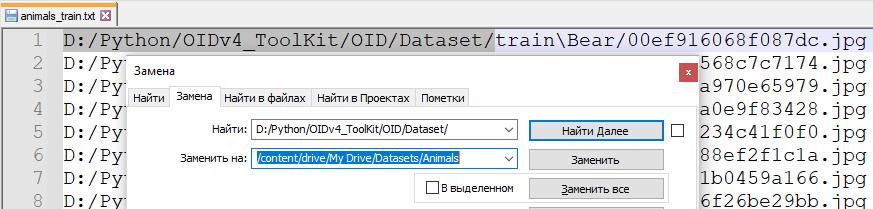

Теперь попробуем запустить этот же конвертер в colab. В архиве есть уменьшеная версия датасета. Попробуем сконвертировать.

In [ ]:
# Импортируем необходимые модули.
import xml.etree.ElementTree as ET
import os
import glob

# Укажем путь к датасету.
data_dir = '/OIDv4_ToolKit/OID/Dataset/'
# Внутри папки общего датасета должны быть
# папки с названиями train и test.
# Укажем есть ли подпапки в папках датасетов.
is_subfolder = True
# В нашем случае да. Каждый класс в своей папке.

# Укажем названия выходных текстовых
# документов аннотаций в формате yolov3.
# В этом документе будет список 
# имён классов объектов.
Dataset_names_path = "animals_names.txt"
# В файлы ниже будут сохраняться метки
# для каждого датасета.
Dataset_train = "animals_train.txt"
Dataset_test = "animals_test.txt"

# Создадим список имён классов объектов.
Dataset_names = []
      
# Функция для сбора информации с файла xml.
def ParseXML(img_folder, file):
    # Создадим список путей ко всем файлам
    # xml в папке и пройдём по нему.
    for xml_file in glob.glob(img_folder+'/*.xml'):
        # Открываем xml файл и 
        # считываем с него информацию.
        tree=ET.parse(open(xml_file))
        # Получаем структуру xml файла.
        root = tree.getroot()
        # Находим и сохраняем имя изображения.
        image_name = root.find('filename').text
        # Собираем путь к изображению.
        img_path = img_folder+'/'+image_name
        # Перебираем все объекты в аннотации.
        for i, obj in enumerate(root.iter('object')):
            # Находим и сохраняем имя класса.
            cls = obj.find('name').text
            # Если этого имени нет в списке имён,
            if cls not in Dataset_names:
                # добавляем это имя в список.
                Dataset_names.append(cls)
            # Вычисляем индекс этого класса.
            cls_id = Dataset_names.index(cls)
            # Находим информацию об 
            # ограничивающей рамке объекта.
            xmlbox = obj.find('bndbox')
            
            # Преобразовываем формат отображения координат 
            # из словесного формата в порядок цифр через запятую 
            # без пробелов: xmin,ymin,xmax,ymax,class_index.
            # Если координаты будут указаны в виде цифр 
            # с плавающей запятой, то отбрасываем дробную 
            # часть и сохраняем в целочисленном виде.
            OBJECT = (str(int(float(xmlbox.find('xmin').text)))+','
                      +str(int(float(xmlbox.find('ymin').text)))+','
                      +str(int(float(xmlbox.find('xmax').text)))+','
                      +str(int(float(xmlbox.find('ymax').text)))+','
                      +str(cls_id))
            # Разделяем рамки объектов проблеми.
            img_path += ' '+OBJECT
        # Выводим сформированную строку аннотации.
        print(img_path)
        # Печатаем эту строку в выходной текстовый документ.
        file.write(img_path+'\n')

# Функция конвертации меток 
# из формата xml в yolov3.
def run_XML_to_YOLOv3():
    # Перебираем папки датасетов (train, test). 
    for i, folder in enumerate(['train','test']):
        # Открываем выходные текстовые
        # документы в режиме записи.
        with open([Dataset_train,Dataset_test][i], "w") as file:
            # Отобразим текущий путь.
            print(os.getcwd()+data_dir+folder)
            
            # Собираем путь к папке с изображениями и метками.
            img_path = os.path.join(os.getcwd()+'/'+folder)
            # Если в папке есть подпапки,
            if is_subfolder:
                # тогда проходим по каждой подпапке
                for directory in os.listdir(img_path):
                    # и добавляем подпапку к пути с изображениями.
                    xml_path = os.path.join(img_path, directory)
                    # Записываем информацию с xml файлов 
                    # в выходной текстовый документ.
                    ParseXML(xml_path, file)
            else:
                # Записываем информацию с xml файлов 
                # в выходной текстовый документ.
                ParseXML(img_path, file)

    # Выводим список имён классов.
    print("Dataset_names:", Dataset_names)
    # Открываем выходной тектовый документ
    # и записываем в него имена классов.
    with open(Dataset_names_path, "w") as file:
        # Перебираем имена классов объектов.
        for name in Dataset_names:
            # Каждое имя класса печатаем с новой строки.
            file.write(str(name)+'\n')

# Запускаем конвертацию.
run_XML_to_YOLOv3()

/content/Lesson_02.Preparing_dataset/OIDv4_ToolKit/OID/Dataset/OIDv4_ToolKit/OID/Dataset/train
/content/Lesson_02.Preparing_dataset/OIDv4_ToolKit/OID/Dataset/train/Bear/6c8b6688ef2f1c1a.jpg 267,190,699,814,0
/content/Lesson_02.Preparing_dataset/OIDv4_ToolKit/OID/Dataset/train/Bear/8988fb6f26be29bb.jpg 67,73,1021,672,0
/content/Lesson_02.Preparing_dataset/OIDv4_ToolKit/OID/Dataset/train/Bear/589de9234c41f0f0.jpg 113,382,604,784,0 270,652,473,851,0
/content/Lesson_02.Preparing_dataset/OIDv4_ToolKit/OID/Dataset/train/Bear/00ef916068f087dc.jpg 588,188,1023,595,0
/content/Lesson_02.Preparing_dataset/OIDv4_ToolKit/OID/Dataset/train/Bear/ee34a826acbe75ce.jpg 0,0,855,686,0
/content/Lesson_02.Preparing_dataset/OIDv4_ToolKit/OID/Dataset/train/Bear/848aef1b0459a166.jpg 477,508,682,742,0
/content/Lesson_02.Preparing_dataset/OIDv4_ToolKit/OID/Dataset/train/Bear/136986568c7c7174.jpg 81,68,486,966,0 419,120,698,770,0
/content/Lesson_02.Preparing_dataset/OIDv4_ToolKit/OID/Dataset/train/Bear/1edd84a970

## Виды и форматы аннотаций.

Мы уже познакомились с форматами аннотаций oid, xml, yolov3. Форматов и представлений столько же, сколько и авторов датсетов. Кто-то старается использовать стандартные популярные форматы, кто-то изобретает свои. Например, вы можите встретить координаты в виде не xmin, ymin, xmax, ymax, а в другом порядке или же через длинну и шируину: x, y, w, h. Также координаты могут быть нормализированы относительно размера изображения.

Вот для примера структура меток уже устаревшей yolov2, которые также использует LabelImg. В начале индекс класса, потом координаты в относительном виде. Вы можете столкнуться с таким форматом в старых датасетах. Здесь, как и в xml, каждое изображение имеет свой файл аннотации, в отличие от yolov3, где все метки шли последовательно в одном документе.

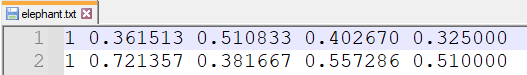

Следующим довольно популярным форматом является json. Он похож на xml использованием словесных форм, но в нём меньше лишней информации.

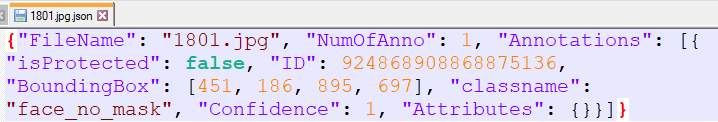

Ниже приведены популярные форматы аннотаций под разные модели.

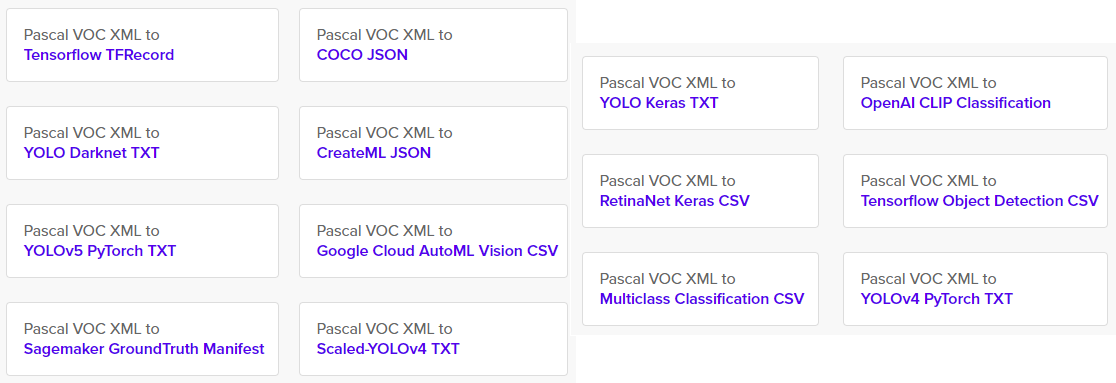

Сбор, очистка и анализ датасета могут занимать чуть ли бОльшую часть времени решения поставленной задачи. В этом уроке мы познакомились с основными инструмента для подготовки датасета. Но их, как и видов задач, очень много. И каждый может найти себе инструмент по вкусу, задаче. Или же написать его самому.

Давайте уже наконец-таки закончим с  подготовкой своего датасета и перейдём к этапу обучения. Чем мы и займёмся в следующем уроке.